In [ ]:
import kagglehub
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

path = kagglehub.dataset_download("cdc/mortality")
print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/2015_data.csv", low_memory=False)
df = df[df["detail_age_type"] == 1]

cause_mapping = {
    1: "Tuberculosis",
    2: "Syphilis",
    3: "HIV disease",
    4: "Malignant neoplasms",
    5: "Malignant neoplasm of stomach",
    6: "Malignant neoplasms of colon, rectum, and anus",
    7: "Malignant neoplasm of pancreas",
    8: "Malignant neoplasms of trachea, bronchus, and lung",
    9: "Malignant neoplasm of breast",
    10: "Malignant neoplasms of cervix uteri, corpus uteri, and ovary",
    11: "Malignant neoplasm of prostate",
    12: "Malignant neoplasms of urinary tract",
    13: "Non-Hodgkin's lymphoma",
    14: "Leukemia",
    15: "Other malignant neoplasms",
    16: "Diabetes mellitus",
    17: "Alzheimer's disease",
    18: "Major cardiovascular diseases",
    19: "Diseases of heart",
    20: "Hypertensive heart disease",
    21: "Ischemic heart diseases",
    22: "Other diseases of heart",
    23: "Hypertension and hypertensive renal disease",
    24: "Cerebrovascular diseases",
    25: "Atherosclerosis",
    26: "Other diseases of circulatory system",
    27: "Influenza and pneumonia",
    28: "Chronic lower respiratory diseases",
    29: "Peptic ulcer",
    30: "Chronic liver disease and cirrhosis",
    31: "Nephritis, nephrotic syndrome, and nephrosis",
    32: "Pregnancy, childbirth, and the puerperium",
    33: "Conditions originating in the perinatal period",
    34: "Congenital malformations, deformations, and chromosomal abnormalities",
    35: "Sudden infant death syndrome",
    36: "Other symptoms, signs, and abnormal findings (excluding SIDS)",
    37: "All other diseases",
    38: "Motor vehicle accidents",
    39: "All other and unspecified accidents and adverse effects",
    40: "Intentional self-harm (suicide)",
    41: "Assault (homicide)",
    42: "All other external causes"
}

def get_top_causes(age, gender, race, education, marital_status, top_n=5):
    # Relax the age filter to include a small range around the selected age
    subset = df[
        (df["detail_age"].between(age - 2, age + 2)) &  # Allow slight flexibility in age
        (df["sex"] == gender)
    ]

    # Optional filters (only apply if selected value exists in dataset)
    if race in df["race"].unique():
        subset = subset[subset["race"] == race]
    
    if education in df["education_2003_revision"].unique():
        subset = subset[subset["education_2003_revision"] == education]

    if marital_status in df["marital_status"].unique():
        subset = subset[subset["marital_status"] == marital_status]
    
    if subset.empty:
        return None

    cause_counts = subset["39_cause_recode"].value_counts().head(top_n)
    return cause_counts

# Function to plot the top causes of death
def plot_top_causes(age, gender, race, education, marital_status):
    plt.figure(figsize=(10, 5))
    causes = get_top_causes(age, gender, race, education, marital_status)
    
    if causes is None:
        print("No data available for this demographic.")
        return
    
    labels = [cause_mapping.get(c, f"Cause {c}") for c in causes.index]
    plt.bar(labels, causes.values, color='skyblue')
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Cause of Death")
    plt.ylabel("Number of Deaths")
    plt.title(f"Top Causes of Death for Age {age}, Gender {gender}, Race {race}")
    plt.show()

# Interactive widgets
age_slider = widgets.IntSlider(min=0, max=100, step=1, description="Age:")
gender_dropdown = widgets.Dropdown(options=[("Male", "M"), ("Female", "F")], description="Gender:")
race_dropdown = widgets.Dropdown(
    options=[
        "White", "Black", "Korean", "Vietnamese", "Indian", "Native American", 
        "Hawaiian", "Chinese", "Japanese", "other Asian or Pacific Islander", 
        "Filipino", "Samoan", "Guamanian"
    ], 
    description="Race:"
)
education_dropdown = widgets.Dropdown(
    options=[("8th grade or less", 1), ("Some high school", 2), ("High School Diploma", 3),
             ("Some college", 4), ("Associate Degree", 5), ("Bachelor’s Degree", 6),
             ("Master’s Degree", 7), ("Doctorate", 8), ("Unknown", 9)],
    description="Education:"
)
marital_dropdown = widgets.Dropdown(
    options=[("Single", "S"), ("Married", "M"), ("Widowed", "W"), ("Divorced", "D"), ("Unknown", "U")], 
    description="Marital Status:"
)

# Display interactive widget
display(
    widgets.interactive(
        plot_top_causes, 
        age=age_slider, 
        gender=gender_dropdown, 
        race=race_dropdown, 
        education=education_dropdown, 
        marital_status=marital_dropdown
    )
)


Path to dataset files: C:\Users\maxim\.cache\kagglehub\datasets\cdc\mortality\versions\2


interactive(children=(IntSlider(value=0, description='Age:'), Dropdown(description='Gender:', options=(('Male'…

Path to dataset files: C:\Users\maxim\.cache\kagglehub\datasets\cdc\mortality\versions\2

Miles's Visualization:


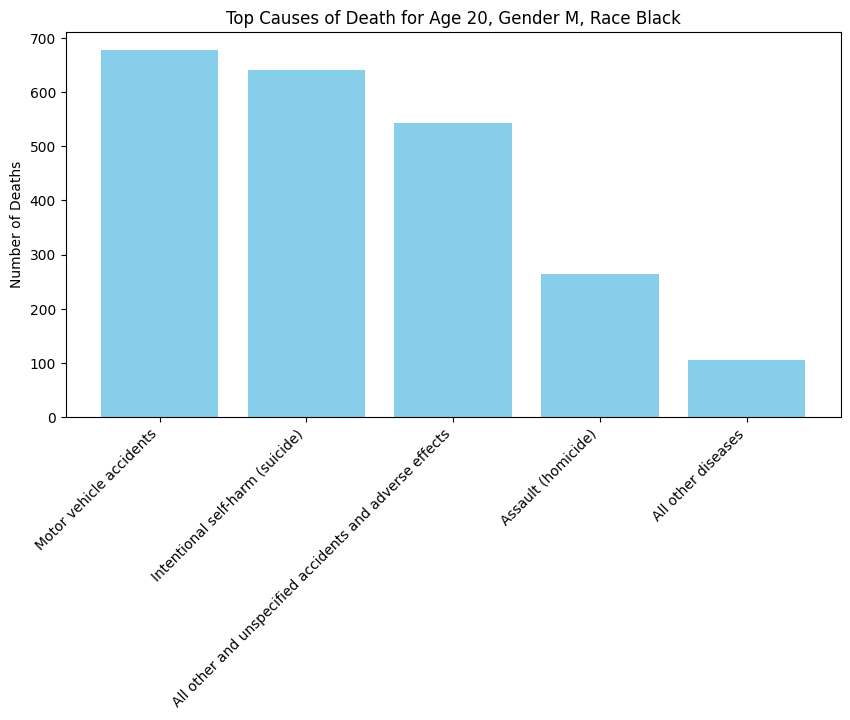


Jonas's Visualization:


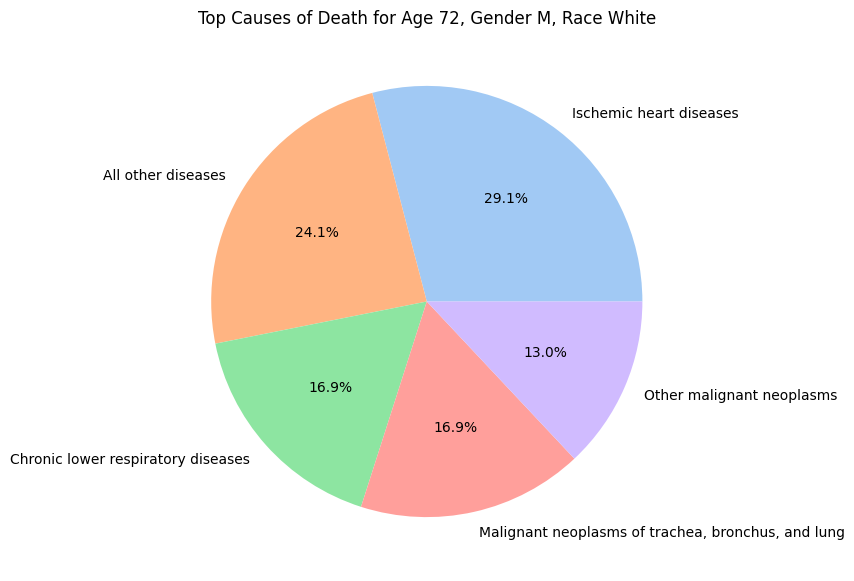


Alma's Visualization:


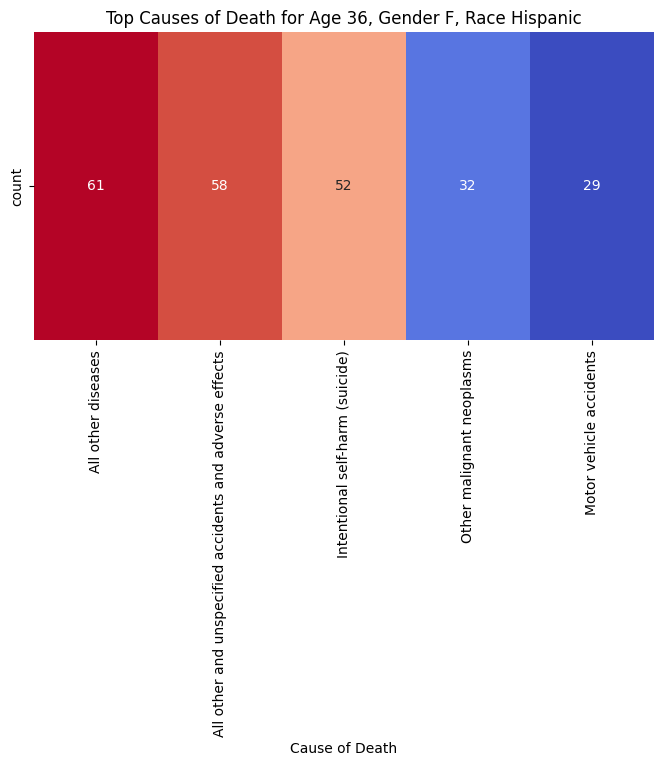

interactive(children=(IntSlider(value=0, description='Age:'), Dropdown(description='Gender:', options=(('Male'…

In [11]:
import kagglehub
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Download dataset
path = kagglehub.dataset_download("cdc/mortality")
print("Path to dataset files:", path)

# Load and filter data
df = pd.read_csv(f"{path}/2015_data.csv", low_memory=False)
df = df[df["detail_age_type"] == 1] 

# Define cause mapping
cause_mapping = {
    1: "Tuberculosis",
    2: "Syphilis",
    3: "HIV disease",
    4: "Malignant neoplasms",
    5: "Malignant neoplasm of stomach",
    6: "Malignant neoplasms of colon, rectum, and anus",
    7: "Malignant neoplasm of pancreas",
    8: "Malignant neoplasms of trachea, bronchus, and lung",
    9: "Malignant neoplasm of breast",
    10: "Malignant neoplasms of cervix uteri, corpus uteri, and ovary",
    11: "Malignant neoplasm of prostate",
    12: "Malignant neoplasms of urinary tract",
    13: "Non-Hodgkin's lymphoma",
    14: "Leukemia",
    15: "Other malignant neoplasms",
    16: "Diabetes mellitus",
    17: "Alzheimer's disease",
    18: "Major cardiovascular diseases",
    19: "Diseases of heart",
    20: "Hypertensive heart disease",
    21: "Ischemic heart diseases",
    22: "Other diseases of heart",
    23: "Hypertension and hypertensive renal disease",
    24: "Cerebrovascular diseases",
    25: "Atherosclerosis",
    26: "Other diseases of circulatory system",
    27: "Influenza and pneumonia",
    28: "Chronic lower respiratory diseases",
    29: "Peptic ulcer",
    30: "Chronic liver disease and cirrhosis",
    31: "Nephritis, nephrotic syndrome, and nephrosis",
    32: "Pregnancy, childbirth, and the puerperium",
    33: "Conditions originating in the perinatal period",
    34: "Congenital malformations, deformations, and chromosomal abnormalities",
    35: "Sudden infant death syndrome",
    36: "Other symptoms, signs, and abnormal findings (excluding SIDS)",
    37: "All other diseases",
    38: "Motor vehicle accidents",
    39: "All other and unspecified accidents and adverse effects",
    40: "Intentional self-harm (suicide)",
    41: "Assault (homicide)",
    42: "All other external causes"
}

# Function to bin age
def bin_age(age):
    if age < 18:
        return "Child"
    elif age < 30:
        return "Young Adult"
    elif age < 50:
        return "Adult"
    elif age < 65:
        return "Middle-aged"
    else:
        return "Elder"



def get_top_causes(age, gender, race, education, marital_status, top_n=5):
    # Relax the age filter to include a small range around the selected age
    subset = df[
        (df["detail_age"].between(age - 2, age + 2)) &  # Allow slight flexibility in age
        (df["sex"] == gender)
    ]

    # Optional filters (only apply if selected value exists in dataset)
    if race in df["race"].unique():
        subset = subset[subset["race"] == race]
    
    if education in df["education_2003_revision"].unique():
        subset = subset[subset["education_2003_revision"] == education]

    if marital_status in df["marital_status"].unique():
        subset = subset[subset["marital_status"] == marital_status]
    
    if subset.empty:
        return None

    cause_counts = subset["39_cause_recode"].value_counts().head(top_n)
    return cause_counts

# Different visualization functions
def bar_chart(causes, age, gender, race):
    plt.figure(figsize=(10, 5))
    labels = [cause_mapping.get(c, f"Cause {c}") for c in causes.index]
    plt.bar(labels, causes.values, color='skyblue')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Number of Deaths")
    plt.title(f"Top Causes of Death for Age {age}, Gender {gender}, Race {race}")
    plt.show()

def pie_chart(causes, age, gender, race):
    labels = [cause_mapping.get(c, f"Cause {c}") for c in causes.index]
    plt.figure(figsize=(7, 7))
    plt.pie(causes.values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title(f"Top Causes of Death for Age {age}, Gender {gender}, Race {race}")
    plt.show()

def heatmap_chart(causes, age, gender, race):
    data = pd.DataFrame(causes).T
    data.columns = [cause_mapping.get(c, f"Cause {c}") for c in causes.index]
    
    plt.figure(figsize=(8, 4))
    sns.heatmap(data, annot=True, fmt="d", cmap="coolwarm", cbar=False)
    plt.title(f"Top Causes of Death for Age {age}, Gender {gender}, Race {race}")
    plt.xlabel("Cause of Death")
    plt.show()


# Function to plot with persona-specific visualization
def plot_persona(age, gender, race, education, marital_status, visualization="bar"):
    causes = get_top_causes(age, gender, race, education, marital_status)
    
    if causes is None:
        print("No data available for this demographic.")
        return
    
    if visualization == "bar":
        bar_chart(causes, age, gender, race)
    elif visualization == "pie":
        pie_chart(causes, age, gender, race)
    elif visualization == "heatmap":
        heatmap_chart(causes, age, gender, race)
    else:
        print("Invalid visualization type")

# Predefined personas
personas = {
    "Miles": (20, "M", "Black", 4, "S", "bar"),
    "Jonas": (72, "M", "White", 3, "W", "pie"),
    "Alma": (36, "F", "Hispanic", 6, "S", "heatmap")
}

# Generate visualizations for personas
for name, (age, gender, race, education, marital_status, vis) in personas.items():
    print(f"\n{name}'s Visualization:")
    plot_persona(age, gender, race, education, marital_status, vis)

# Interactive widgets
age_slider = widgets.IntSlider(min=0, max=100, step=1, description="Age:")
gender_dropdown = widgets.Dropdown(options=[("Male", "M"), ("Female", "F")], description="Gender:")
race_dropdown = widgets.Dropdown(
    options=[
        "White", "Black", "Hispanic", "Korean", "Vietnamese", "Indian", "Native American", 
        "Hawaiian", "Chinese", "Japanese", "other Asian or Pacific Islander", 
        "Filipino", "Samoan", "Guamanian"
        ], description="Race:")
education_dropdown = widgets.Dropdown(
    options=[("8th grade or less", 1), ("Some high school", 2), ("High School Diploma", 3),
             ("Some college", 4), ("Associate Degree", 5), ("Bachelor’s Degree", 6),
             ("Master’s Degree", 7), ("Doctorate", 8), ("Unknown", 9)],
    description="Education:"
)
marital_dropdown = widgets.Dropdown(
    options=[("Single", "S"), ("Married", "M"), ("Widowed", "W"), ("Divorced", "D"), ("Unknown", "U")], 
    description="Marital Status:"
)
vis_dropdown = widgets.Dropdown(options=[("Bar Chart", "bar"), ("Pie Chart", "pie"), ("Heatmap", "heatmap")], description="Chart Type:")

display(widgets.interactive(plot_persona, age=age_slider, gender=gender_dropdown, race=race_dropdown, education=education_dropdown, marital_status=marital_dropdown, visualization=vis_dropdown))


### B. Most successful visualization & techniques  
The bar chart is the most effective visualization because:  
- It allows easy comparison of death causes.  
- The values are clearly readable.  

**Differnet techniques used:**  
- Seaborn & Matplotlib  
- Categorical x-axis with rotated labels  
- Skyblue color for better aesthetics
- Bar chart, pie chart and heatmap

---

### C. Good vs bad questions for personalized visualization  
**Good questions:**  
1. What are the top 5 causes of death for men aged 50?  
2. How do causes of death vary by age group?  
3. What is the most common cause of death for highly educated women?  
4. How does marital status influence mortality causes?  

**Bad questions:**  
1. What is my life expectancy?  
2. What is the exact death probability for an individual?  
3. How do diet and exercise affect mortality?  
4. How do death rates change per season?  

---

### D. Required user inputs for the CDC tool  
Breaking this down in must-have info and less relevant, users should enter:  

**Must-have:**
- Age
- Gender
- Marital Status 

**Less-relevant:**
- Race / ethnicity  
- Education Level
- Birthplace
  

---

### E. Data binning for a better user experience  
**Age (detail_age):**  
- 0-17: Child  
- 18-29: Young Adult  
- 30-49: Adult  
- 50-64: Middle-Aged  
- 65+: Elderly  

**Gender (gender):** M - Male, F - Female  

**Race (race):** Grouped as Caucasian, African descent, Asian descent, Indigenous, Other  

**Education (education_2003_revision):**  
- 1-2: Low (No High School)  
- 3-4: Medium (High School Diploma)  
- 5-6: Higher Ed (Bachelor+)  
- 7-8: Postgrad (Master/PhD)  
- 9: Unknown  

**Marital status (marital_status):**  
S - Single, M - Married, W - Widowed, D - Divorced, U - Unknown  

**Cause of death (39_cause_recode):**  
- Cardiovascular (Heart disease, Stroke)  
- Cancer (Lung, Breast, Leukemia)  
- Infectious (Flu, Pneumonia, HIV)  
- External (Suicide, Accidents, Homicide)  
- Other  

